# <font color="#8333ff"> Projet 3 (Suite) : Concevez une application au service de la santé publique

# <font color="#8333ff">     Partie 2: Analyse exploratoire

Nous avons **cleané la base de données issue du site "Santé Publique France"** dans la première partie de ce projet.</br>
Nous allons maintenant exploiter la base de données et faire plusieurs types d'analyse :</br>
    - des **analyses univariées**,</br>
    - des **analyses bivariées**,</br>
    - des **analyses multivariées**.</br>


## <font color="blue">Sommaire</font>

1. [Analyses univariées](#section_1)    
    a. [Variables numériques](#section_1_a)  
    b. [Variables catégorielles](#section_1_b)     
2. [Analyses bivariées](#section_2)     
    a. [Graphiques croisant une variable numérique avec une variable catégorielle](#section_2_a)     
    b. [Graphiques croisant 2 variables numériques](#section_2_b)     
    c. [La matrice des corrélations : qui montre l'importance de la relation linéaire qu'il peut exister entre des paires de variables.](#section_2_c)          
3. [Analyses multivariées](#section_3)     
    a. [Réalisation d'une analyse descriptive, avec l'Analyse en Composantes Principales, ACP](#section_3_a)     
    b. [Analyse explicative avec l'Anova](#section_3_b)      

On importe les librairies nécessaires pour ces analyses ainsi que la base cleanée.

In [1]:
#import des librairies dont nous aurons besoin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import du ficher csv cleané 'data_concat_final.csv' et chargement en une dataframe "data_clean"
data_clean = pd.read_csv('data_concat_final2.csv')

C:\Users\laila\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#on montre toutes les colonnes et lignes
pd.set_option("max_columns", None) 
pd.set_option("max_rows", None)

#suppression des messages d'avertissement
import warnings
warnings.filterwarnings('ignore')

## <font color="red" id="section_1">1. Analyses univariées</font>

Regardons le nombre de lignes et colonnes de notre base cleanée ainsi que les statistiques descriptives des variables.

In [4]:
#Nombre de lignes et de colonnes de la dataframe "data_clean"
data_clean.shape


(255666, 18)

In [5]:
#Statistiques descriptives des variables de notre dataframe "data_clean"
data_clean.describe(include="all")

,Unnamed: 0,code,product_name,ingredients_text,pnns_groups_1,pnns_groups_2,energy_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g_sans_nan,fat_100g,satured-fat_100g,nutrition_grade_frok,countries_ok
count,255666.000000,255666.0,255666,255666,255666,255666,255666.000000,255666.000000,255666.000000,255666.000000,255666.000000,255666.000000,255666.000000,255666.000000,255666.000000,255666.000000,255666,255666
unique,NaN,255666.0,182976,189734,14,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,23
top,NaN,4530.0,unknown,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,États-Unis
freq,NaN,1.0,3327,26913,200089,199892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73703,165306
mean,127832.617654,NaN,NaN,NaN,NaN,NaN,1132.968525,31.862723,11.155048,1.713403,5.930091,0.730591,0.287653,9.014675,9.685606,3.538591,NaN,NaN
std,73804.742310,NaN,NaN,NaN,NaN,NaN,767.336711,28.087593,14.155428,1.896081,5.834820,0.742258,0.292219,8.730163,11.650325,4.484175,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000,NaN,NaN
25%,63916.250000,NaN,NaN,NaN,NaN,NaN,412.000000,7.140000,1.690000,0.000000,0.830000,0.080000,0.031496,1.000000,0.300000,0.000000,NaN,NaN
50%,127832.500000,NaN,NaN,NaN,NaN,NaN,1127.000000,21.540000,4.800000,1.200000,4.500000,0.635000,0.250000,9.000000,4.520000,1.330000,NaN,NaN
75%,191748.750000,NaN,NaN,NaN,NaN,NaN,1674.000000,57.140000,14.580000,2.400000,8.700000,1.109980,0.437000,16.000000,16.000000,6.189167,NaN,NaN


In [6]:
data_clean.columns

Index(['Unnamed: 0', 'code', 'product_name', 'ingredients_text',
       'pnns_groups_1', 'pnns_groups_2', 'energy_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g_sans_nan', 'fat_100g',
       'satured-fat_100g', 'nutrition_grade_frok', 'countries_ok'],
      dtype='object')

### <font color="blue" id="section_1_a">a. Variables numériques</font>


Nous allons d'abord analyser les variables numériques et voir la tendance graphique de ces variables.

#### <font color="green" id="section_1_a_1">a.1. Graphiques de distribution ou histogrammes des variables quantitatives</font>


Regardons la distribution des variables numériques.

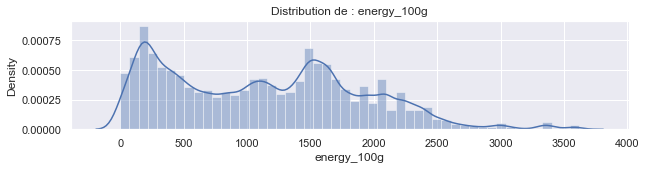

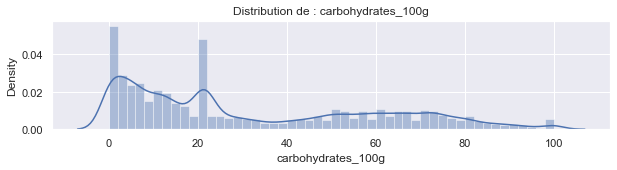

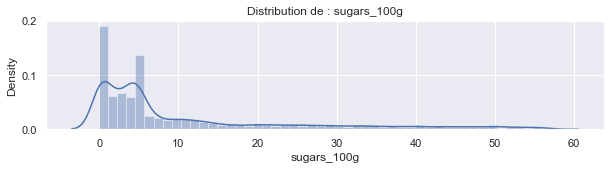

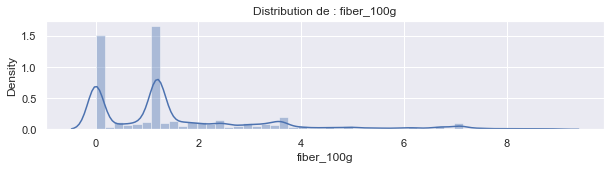

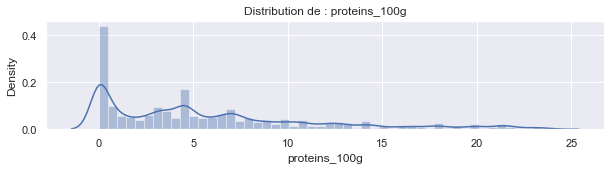

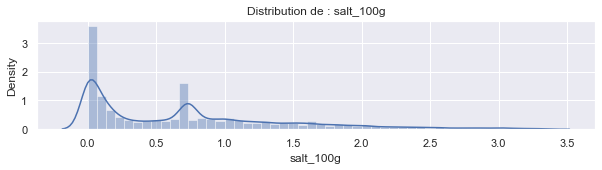

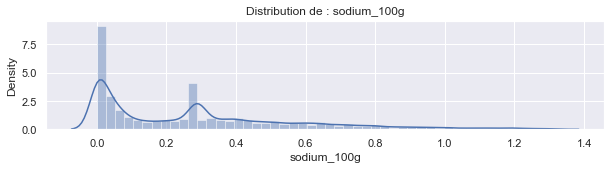

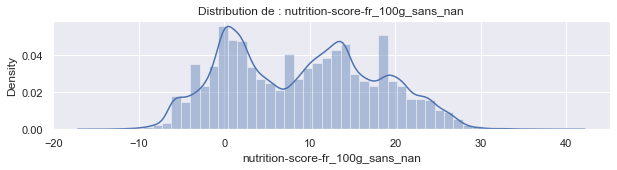

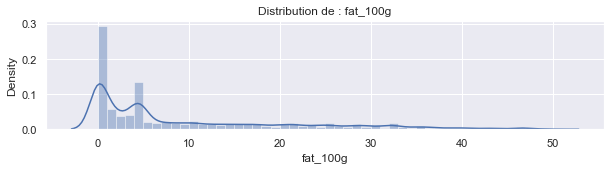

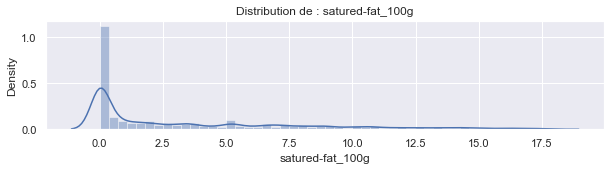

In [7]:
#graphique pour chacune des variables numériques
liste_num = ['energy_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g_sans_nan', 'fat_100g','satured-fat_100g']
for variable in liste_num:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data_clean[variable], bins=50) 
    titre = 'Distribution de : ' + variable
    plt.title(titre) 
    plt.show()
    print('')


Nous remarquons que les variables **'proteins_100g', 'sugars_100g','fat_100g', 'saturated-fat_100g',
'fiber_100g','carbohydrates_100g','salt_100g','sodium_100g'**  ont une tendance graphique similaire. Elles ont une effectif important pour la valeur nulle.
On pourrait donc supposer une corrélation entre certaines de ces variables.</br>



#### <font color="green" id="section_1_a_2">a.2. Box plot des variables quantitatives</font>


Regardons les boîtes à moustache de ces variables. Cela nous permettra de voir certaines de leur données statistiques :
médiane, quartiles, maximum et minimum. 

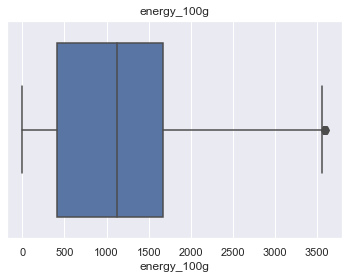

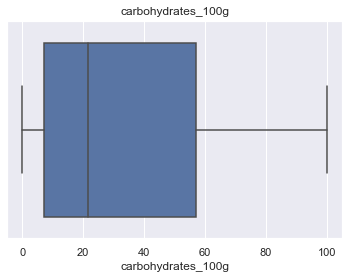

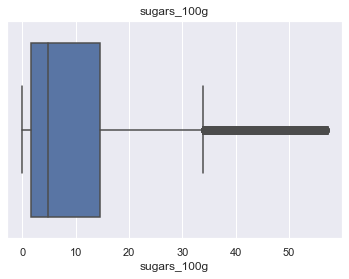

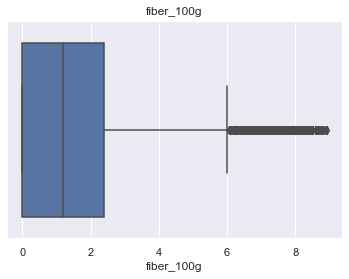

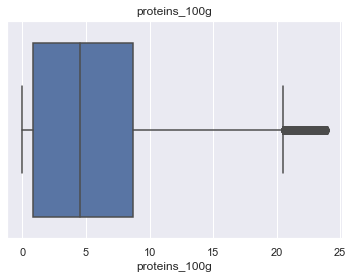

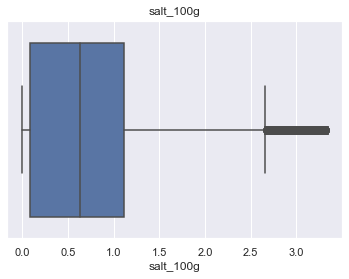

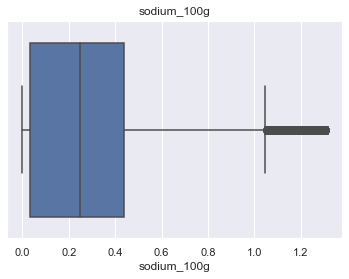

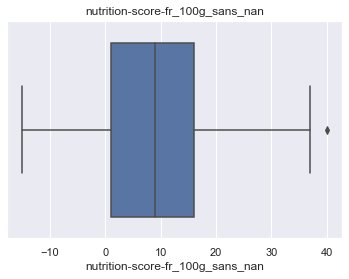

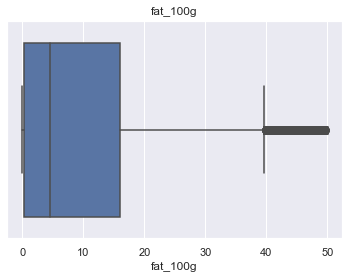

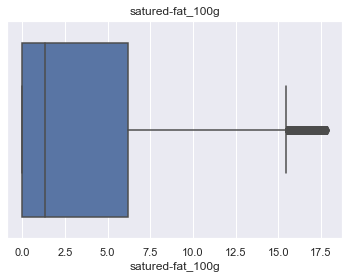

In [8]:
# voyons le graphe de nouveau
for variable in liste_num:
    sns.boxplot(data_clean[variable])
    plt.title(variable)
    plt.show()
    print('')
#on ajuste la taille
sns.set(font_scale=1)

**Interprétation de ces boxplot :**</br>
    * **"energy_100g"** : la médiane est assez éloigné du maximum et se situe à 1100 kJ/100g. Entre 25 et 75% des données sont
        entre 400 et 1700 kJ. Seul 25% des données sont entre 1600 et 3500 kJ pour 100g, et 25% sont entre 0 et 400kJ/100g.</br>
    * **"carbohydrates_100g"** : La médiane se situe à 21g. Entre 25 et 75% des données des produits sont situées entre 8
        et 58 g de glucides pour 100g.</br>
        il s'agit du glucide. Ce sont les sucres (ajoutés ou présents naturellement dans un aliment),
        les fibres et l’amidon (ce dernier n’est pas toujours indiqué). </br>
        Dans une étiquette de produit, si le terme "glucides" apparaît seul sans plus de détail, cela signifie qu'il 
        n'y a pas de sucres ajoutés. Si le mot "dont sucres" est indiqué, cela ne désigne que les sucres simples, c'est-à-dire le saccharose,
        le glucose et le fructose qui peuvent être naturels ou ajoutés.</br>
     * **"sugars_100g"** : Le sucre est plus faible que le carbohydrate ou glucide, cela est normal car les sucres sont contenus 
        dans les glucides.La médiane est située à 5g. Entre 25 et 75% des données sont entre 2 et 14 g. Cela va entre 0 et 34.
        Nous avons traité les valeurs aberrantes, mais ils semblent y en avoir encore. Les valeurs au dessus des bornes
        sup et inf ont été supprimé.</br>
     * **"sodium_100g" et "salt_100g"** : ont des box plot qui se ressemblent, elles sont très corrélées.</br>
     * **"nutri-score-fr_sans_nan"** : a un point extérieur à la borne supérieur du box plot, on pourrait penser qu'il s'agit d'une valeur
        aberrante. Or, le nutriscore doit être compris entre -15 et 40. Nous allons donc garder cette valeur.</br>
     * **"fat_100g"** : il a une boite à moustache similaire à celle des graisses saturées. 
        On peut penser que l'un influence sur l'autre.
    
    

Après avoir fait des analyses univariés sur les variables numériques de notre dataframe, nous allons maintenant
les faire sur les variables catégorielles.

### <font color="blue" id="section_1_b">b. Variables catégorielles</font>

Etant donné la quantité de mots dans les variables **"ingredients_text" et "product_name"**, nous allons, à l'aide d'un nuage
de mots voir quels sont les mots les plus représentés. Nous verrons également cette représentation pour les autres
variables catégorielles.

In [7]:
liste_categ=["ingredients_text","product_name",'pnns_groups_1', 'pnns_groups_2','countries_ok']

#### <font color="green" id="section_1_b_1">b.1. Nuage de mots des variables catégorielles ou qualitatives</font>

In [2]:
conda install -c https://conda.anaconda.org/conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
from wordcloud import WordCloud

#fonction qui récupère les mots les plus utilisés parmis le nombre_max donné
def top_mot(data, variable, nombre_max):
  comptage_mot_cle = dict()
  for index, var in data[variable].iteritems():
    if isinstance(var, float):
      continue
    for mot in var.split(','):
      if mot in comptage_mot_cle.keys():
        comptage_mot_cle[mot] += 1
      else :
        comptage_mot_cle[mot] = 1
  
  mot_top = []
  for i,j in comptage_mot_cle.items():
    mot_top.append([i,j])
  mot_top.sort(key = lambda x:x[1], reverse = True)

  return mot_top[:nombre_max]

#fonction qui trace un nuage de mots
def nuage_de_mots(data,variable,nombre_max):
  fig = plt.figure(1, figsize=(15,15))
  ax1 = fig.add_subplot(1,1,1)
  mot = dict()
  mot_top = top_mot(data_clean, variable, nombre_max)
  for i in mot_top:
    mot[i[0]] = i[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(mot)

  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nombre_max, variable), fontsize=22)
  plt.show()




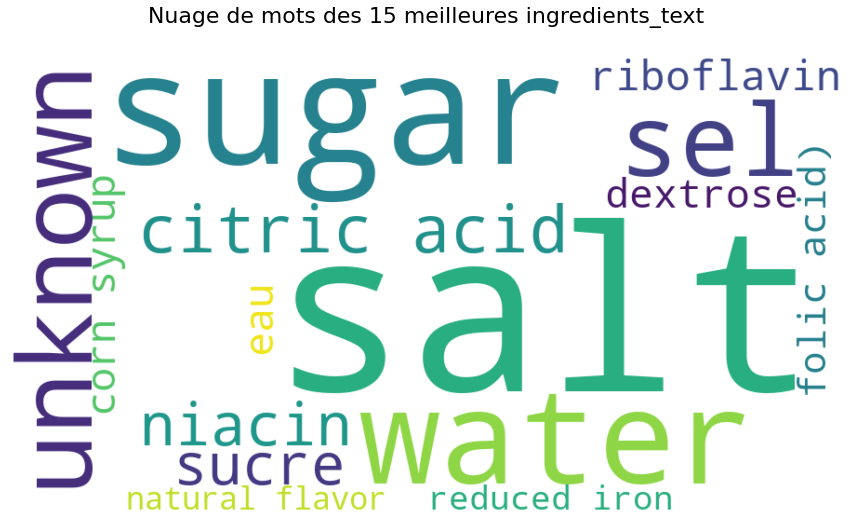

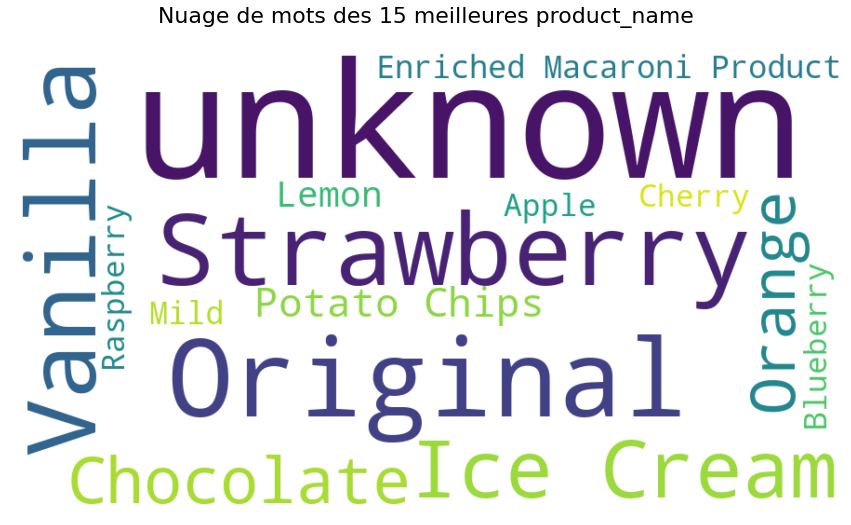

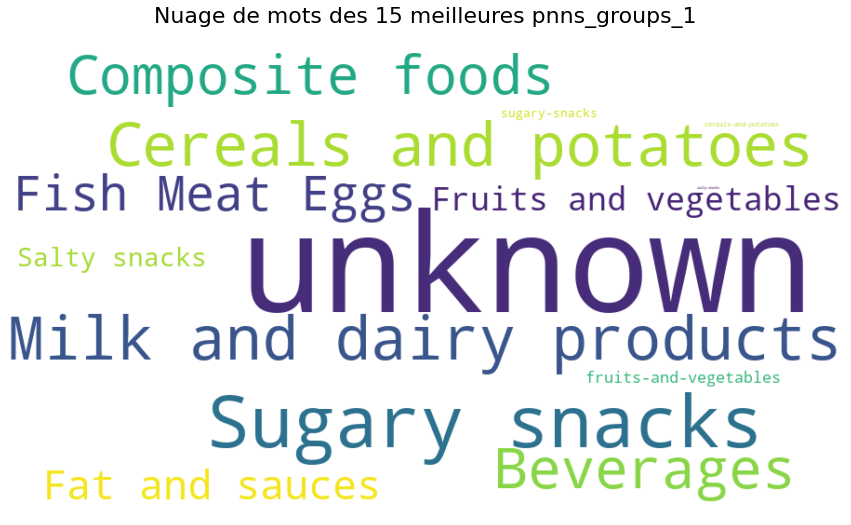

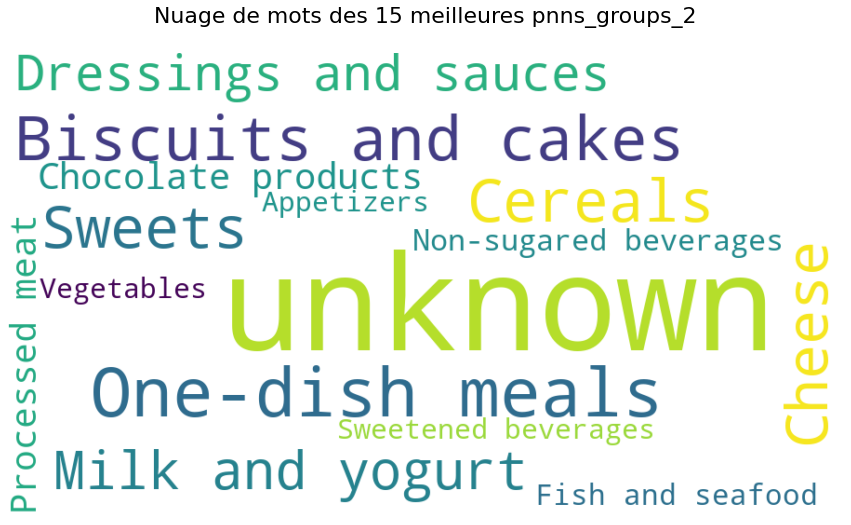

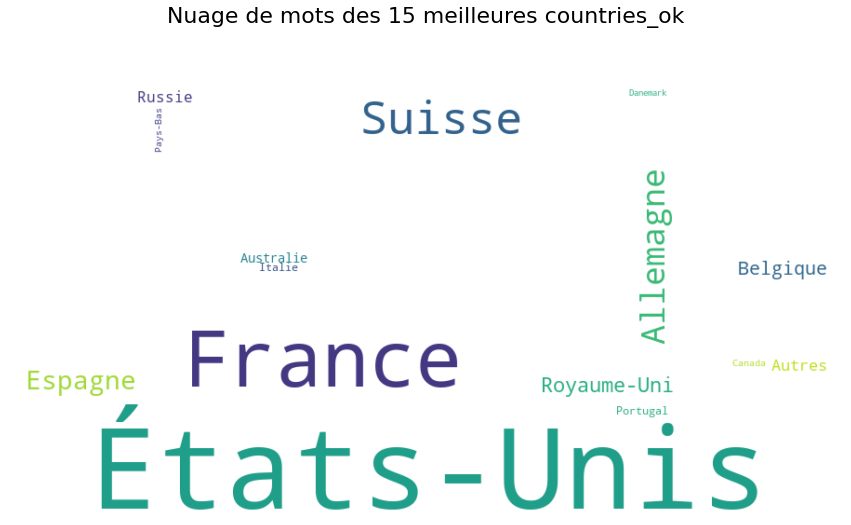

In [11]:
for variable in liste_categ: 
    nuage_de_mots(data_clean,variable,15) 
    

Dans **"ingredients_text"**, on voit principalement la présence de sel et sucre, d'eau en majorité.
En effet, il s'agit là de produit sucré ou salé. Il y a aussi l'acide citrique, qui est un acide végétal organique
naturel. Il a le rôle d'additif alimentaire, acidifiant pour boissons et régulateur de PH.</br>
Dans les **noms de produits**, nous avons beaucoup de produits bio, des saveurs telles que fraise, chocolat, citron, pomme,
vanille,ornage,cerise, des crèmes glacés etc...</br>
Dans les **catégories de produits "pnns_groups_1"**, il y a beaucoup de produits laitiers, des Céréales et pommes de terre, 
du poisson, viandes et oeufs, et des boisssons etc...
Dans les **catégories de produits "pnns_groups_1"**,il y a beaucoup de biscuits et gateaux, des plats préparés, bonbons, des 
vinaigrettes et sauces, des céréals, du lait et yaourt etc...
Dans les **pays où sont vendus les produits**, ils sont vendus principalement des Etats Unis,de la France, de la Suisse, de 
l'Allemagne etc...

#### <font color="green" id="section_1_b_2">b.2. Nombre de répétitions des mots dans les varaiables catégorielles</font>

Nous allons regarder le nombre de fois où un mot apparait pour les variables **"ingredients_text"** (les ingrédients pour 
chaque produit), **"product_name"** (nom des produits). Ainsi,
nous pourrons voir **les mots qui apparaissent le plus pour chacune de ces variables.**

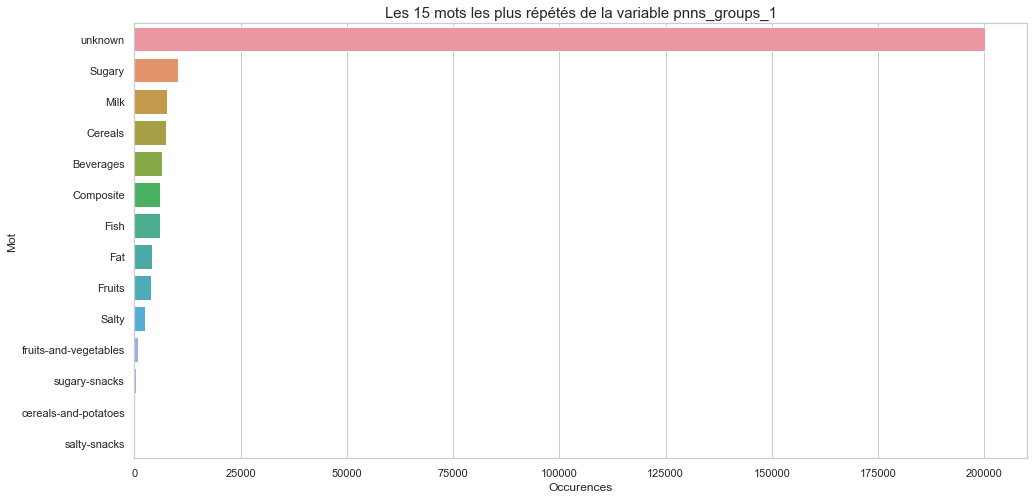

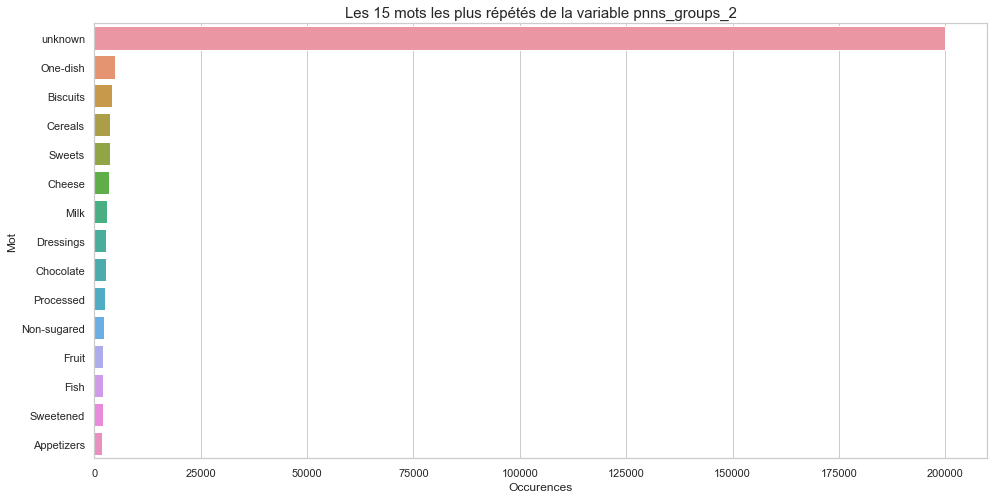

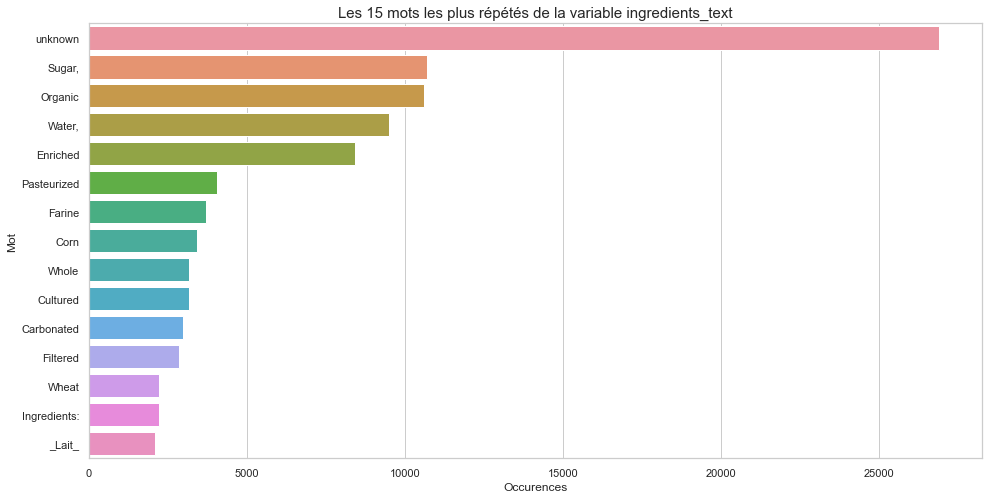

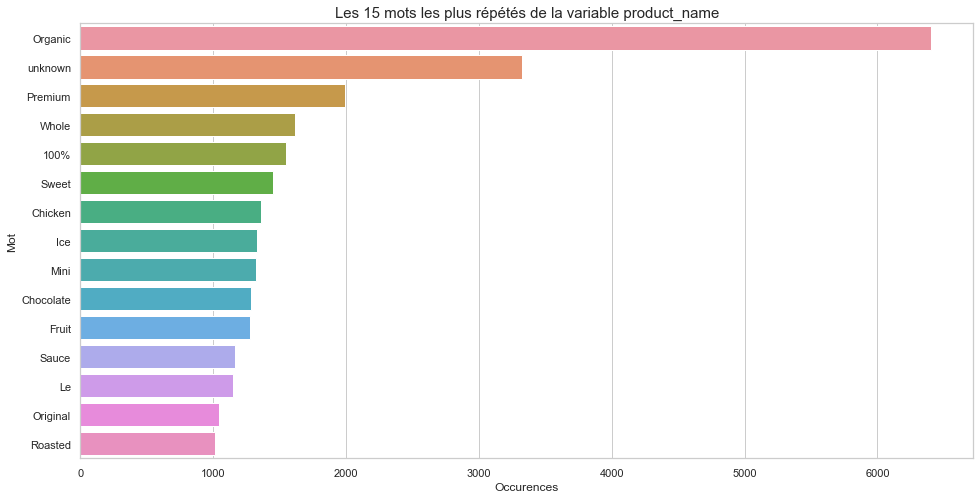

In [12]:
#import du module "collections" qui permet de manipuler les structures de données
import collections
#On crée une liste des variables catégorielles textuelles, afin de calculer le nombre d'occurence par mot
liste_categ3=['pnns_groups_1','pnns_groups_2','ingredients_text','product_name']
#On initialise "mots_occurence" qui va compter le nombre de mots
mots_occurence = []
#Pour chaque variable dans la liste "liste_categ3"
for variable in liste_categ3 :
    #On crée une liste mots en séparant les textes avec l'espace.
    liste_mots = [str(i).split(' ', 1)[0] for i in data_clean[variable].dropna().tolist()]
    #on ajoute "list_mots" à la liste "mots_occurence" et on compte le nombre de fois qu'un mot apparait
    #on garde les 15 mots les plus récurrents
    mots_occurence.append(collections.Counter(liste_mots).most_common(15))

#on change la taille de police du texte dans les axes
sns.set(font_scale=2.5)
#Pour "nom_variable" dans "liste_categ3" et "liste_mots" dans "mots_occurence"
for nom_variable, liste_mots in zip(liste_categ3, mots_occurence):
    #On change le fond sombre de la grille en blanc
    sns.set(style="whitegrid")
    #Création d'une figure de largeur 16 pouces et de hauteur 8 pouces
    plt.figure(figsize=(16, 8))
    #On crée un dataframe avec "liste_mots" en index et "Mot", "Occurences" en colomne et on trie par ordre decroissant
    df_mots = pd.DataFrame(liste_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
    
    #On crée un diagramme en bâtons avec le nombre d'occurences en abscisse et les mots en ordonnée
    sns.barplot(y = 'Mot', x='Occurences', data = df_mots)
    #Titre du graphique
    plt.title('Les 15 mots les plus répétés de la variable ' + nom_variable, size=15)
    #On montre le graphique
    plt.show()



#### <font color="green" id="section_1_b_3">b.3. Diagramme à barres pour les variables qui concernent les pays, le grade nutritionnel et les codes des additifs</font>

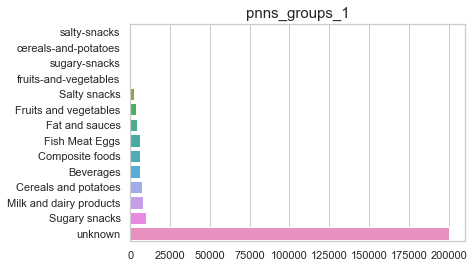

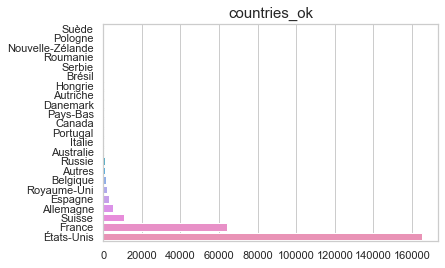

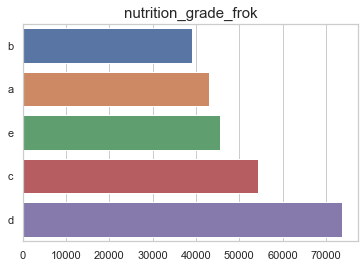

In [16]:
#liste des variables catégorielles
liste_categ2=["pnns_groups_1","countries_ok",'nutrition_grade_frok']
#
for variable in liste_categ2:
    #définit l’arrière-plan du tracé qui sera blanc
    sns.set(style="whitegrid") 
    #taille de la figure
    #plt.figure(figsize=(20, 50))
    plt.title(variable, size=15)
    #Tracé d'un diagramme à barres
    plot = sns.barplot(x = data_clean[variable].value_counts().sort_values().values, 
                       y = data_clean[variable].value_counts().sort_values().index)
    plt.show()

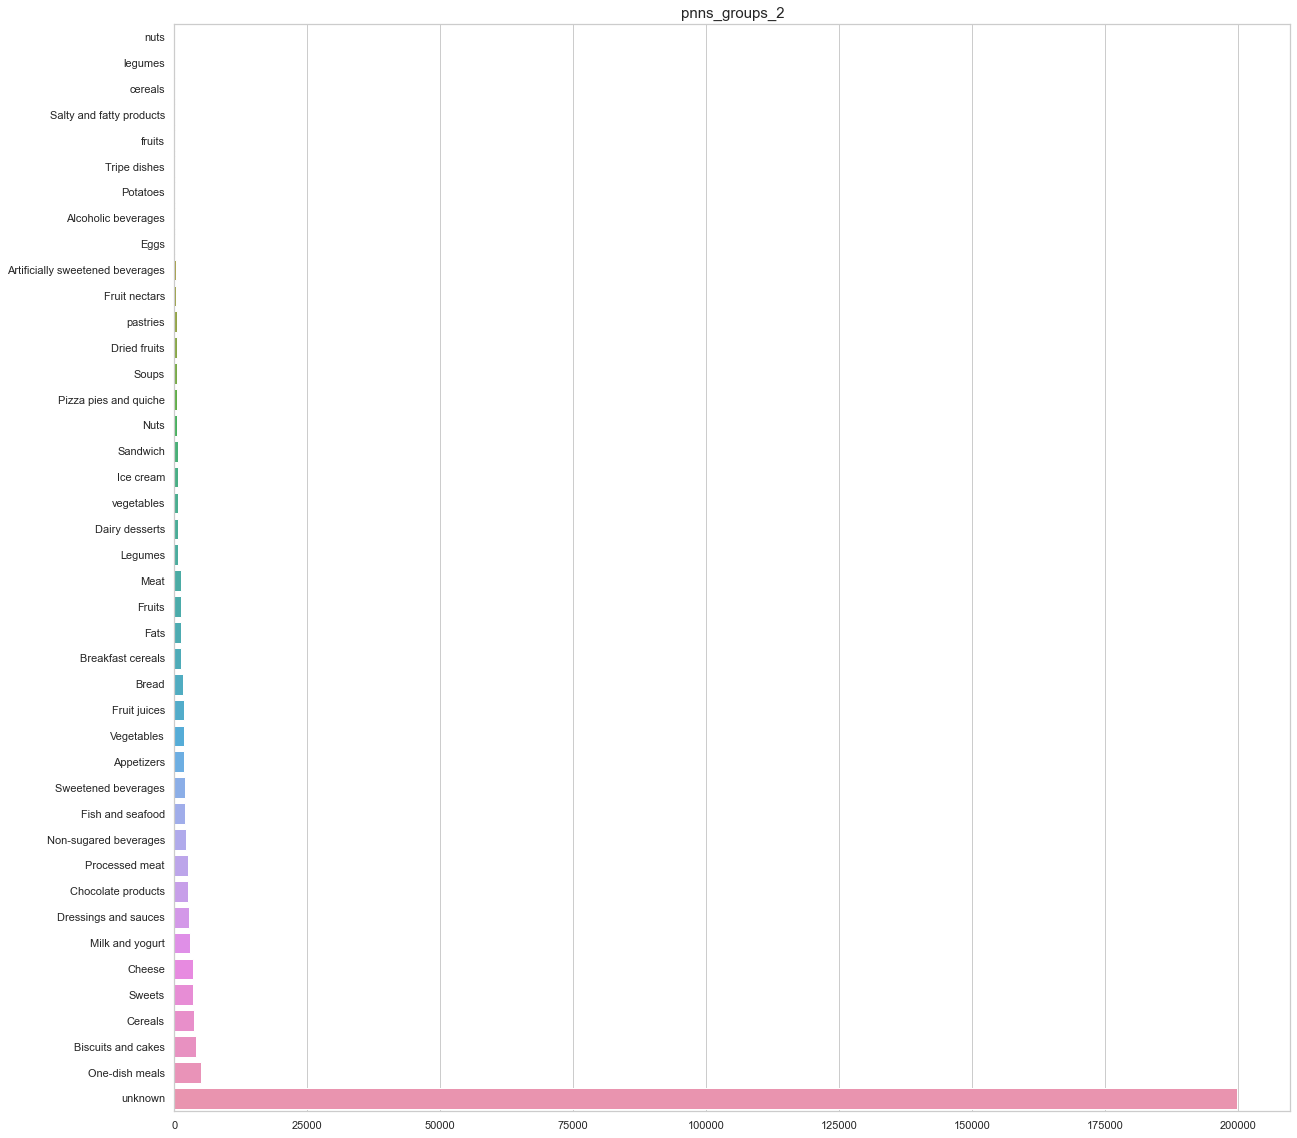

In [18]:
#définit l’arrière-plan du tracé qui sera blanc
sns.set(style="whitegrid") 
#taille de la figure
plt.figure(figsize=(20, 20))
plt.title("pnns_groups_2", size=15)
#Tracé d'un diagramme à barres
plot = sns.barplot(x = data_clean['pnns_groups_2'].value_counts().sort_values().values, 
                   y = data_clean['pnns_groups_2'].value_counts().sort_values().index)
plt.show()

#### <font color="green" id="section_1_b_4">b.4. Diagramme en secteurs pour le grade nutritionnel</font>


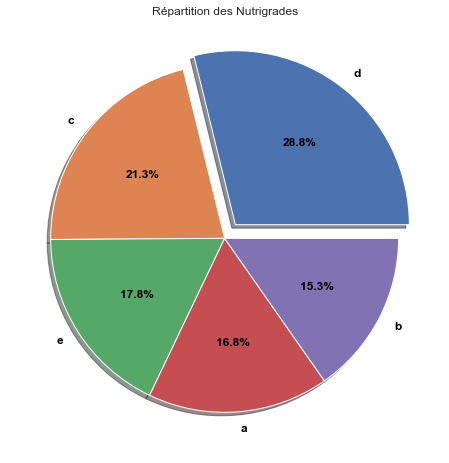

In [22]:
nutrigrades = data_clean.groupby(by='nutrition_grade_frok')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(5)
explodes[0] = .1

plt.pie(nutrigrades, labels=nutrigrades.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des Nutrigrades")
plt.show()

On voit qu'il y a plus d'1/4 des produits (28.8%) qui sont de catégorie "d", puis de catégorie "c" (avec 21.3% des produits)
 et "e" avec 17.8% qui a presque le même pourcentage que la catégorie "a" à 16.8%, et enfin le "b" est à 15.3%.

## <font color="red" id="section_2">2. Analyses bivariées</font>

### <font color="blue" id="section_2_a">a. Graphiques croisant une variable numérique avec une variable catégorielle</font>

La représentation la plus simple à obtenir est celle de la **boîte à moustache pour chaque modalité**. Ce diagramme nous 
permettra de comparer un même caractère dans des populations de tailles différentes.

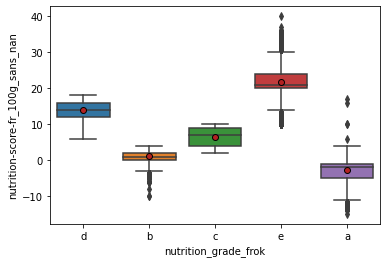

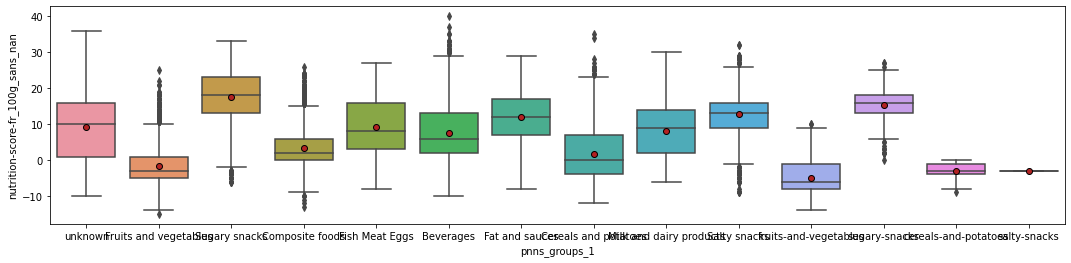

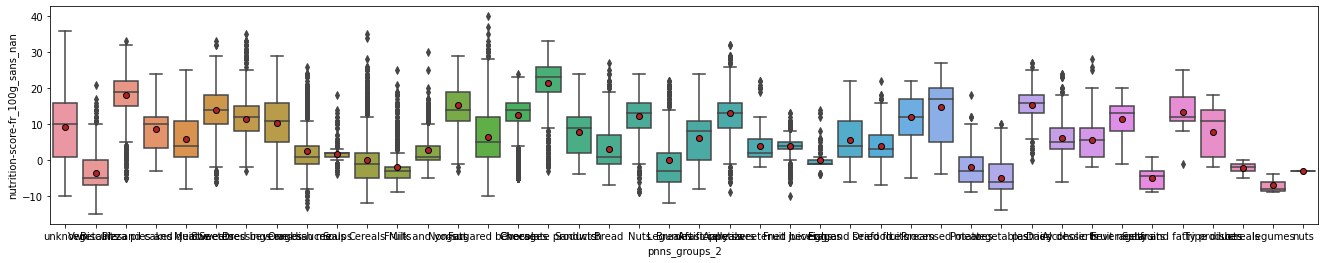

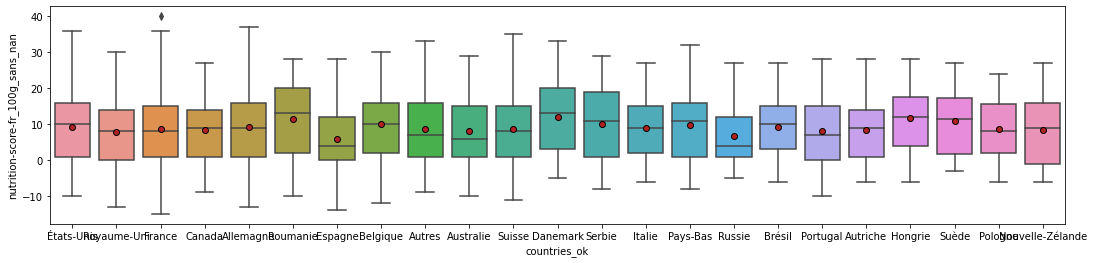

In [33]:
#Box plot affichant le grade nutritionnelle en abscisse et le score nutritionnelle en ordonnée
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
meanprops = {'marker':'o', 'markeredgecolor':'black',
'markerfacecolor':'firebrick'}
sns.boxplot("nutrition_grade_frok",'nutrition-score-fr_100g_sans_nan',data=data_clean, showmeans=True, meanprops=meanprops)

plt.figure(figsize=(40,4))
plt.subplot(1,2,2)
sns.boxplot("pnns_groups_1",'nutrition-score-fr_100g_sans_nan',data=data_clean, showmeans=True, meanprops=meanprops)
plt.show()
plt.figure(figsize=(50,4))
plt.subplot(1,2,2)
sns.boxplot("pnns_groups_2",'nutrition-score-fr_100g_sans_nan',data=data_clean, showmeans=True, meanprops=meanprops)
plt.show()
#Box plot affichant les pays en abscisse et le score nutritionnelle en ordonnée
plt.figure(figsize=(40,4))
plt.subplot(1,2,2)
sns.boxplot("countries_ok",'nutrition-score-fr_100g_sans_nan',data=data_clean, showmeans=True, meanprops=meanprops)
plt.show()


On remarque que les **grades nutritionnelles a, b, c, d et e** sont bien dans les bonnes tranches de valeurs de 
**score nutritionnelles**.</br>
On voit que les scores nutritionnelles diffèrent selon la catégorie du produit.</br>
Les pays ont des scores nutritionnelles dont l'interquartile (Q3 - Q1) est compris entre 0 et 20, mais dont les minimums
et maximums diffèrent selon les pays.</br>
On peut penser que certains pays ont des meilleurs scores nutritionnelles que d'autres.</br>
Nous allons comparer les Etats Unis avec le Canada, à titre d'exemple.


In [6]:
data_clean_US=data_clean['countries_ok']=='États-Unis'
filtered_data_clean_US= data_clean[data_clean_US]

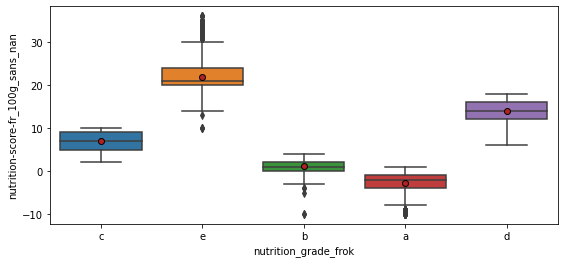

In [17]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,2)
sns.boxplot("nutrition_grade_frok",'nutrition-score-fr_100g_sans_nan',data=filtered_data_clean_US,order={'a','b','c','d','e'}, showmeans=True, meanprops=meanprops)
plt.show()

In [19]:
data_clean_Can=data_clean['countries_ok']=='Canada'
filtered_data_clean_Can= data_clean[data_clean_Can]

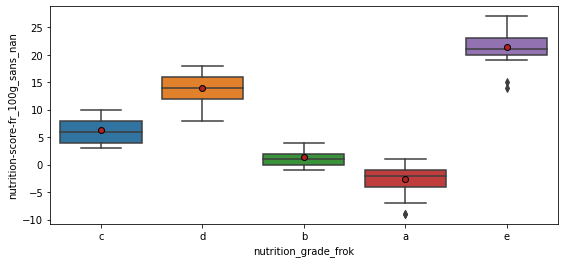

In [21]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,2)
sns.boxplot("nutrition_grade_frok",'nutrition-score-fr_100g_sans_nan',data=filtered_data_clean_Can, showmeans=True, meanprops=meanprops)
plt.show()

On voit que le **nutriscore "b"** est différent pour les Etats Unis, il est entre -10 et 5. Il a des outliers en dessous de -5.
En revanche, le Canada n'a pas d'outliers, il est entre minimum 0 et maximum 5. </br>
En effet, le score 'b' doit etre entre 0 et 5 pour les aliments solides mais en dessous de 1 pour les aliments liquides.
Or, il est probable que la forte consommation de boissons aux Etats Unis fait baisser ce score pour 'b'.</br>
En ce qui concerne le **nutriscore 'e'** (donc la note la plus mauvaise), celui du Canada se situe entre 20 et 25, tandis 
que aux Etats Unis, le score est plutôt entre minimum 15 et 30, avec des outliers qui iraient jusqu'à presque 40. 
On voit donc une différence aussi dans le score des pays. Ici, le 'e' du Canada parait plus "bon" que celui des Etats Unis.
On peut donc envisager la possibilité que le pays influence le score nutritionnel. C'est ce que nous verrons dans la partie 
Analyse Explicative avec l'Anova.

Maintenant, voyons ce qu'il se passe lorsque nous croisons le **nutriscore** avec les **variables numériques servant
à calculer le nutriscore** pour voir les différences entre elles.

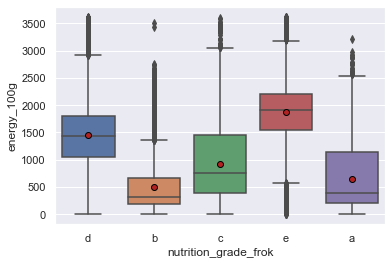

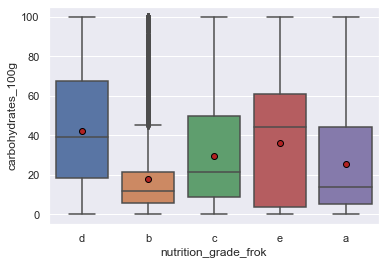

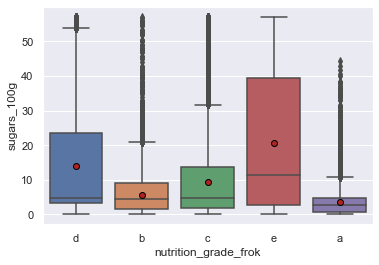

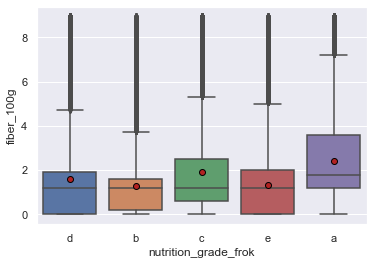

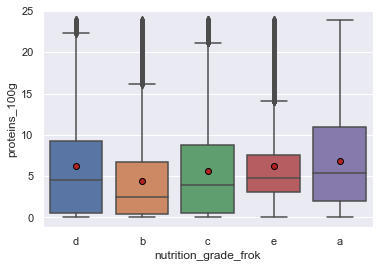

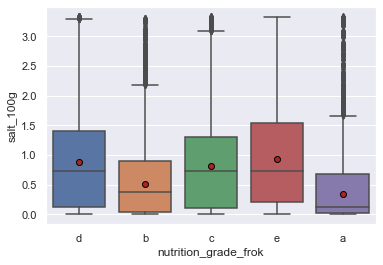

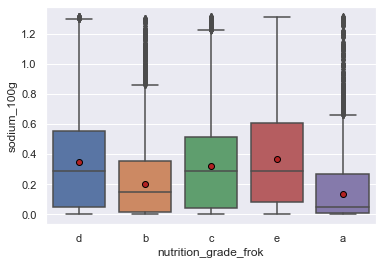

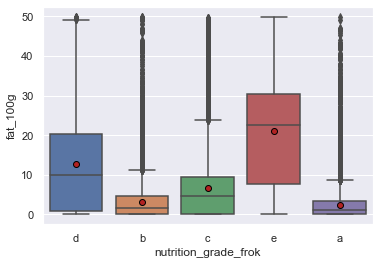

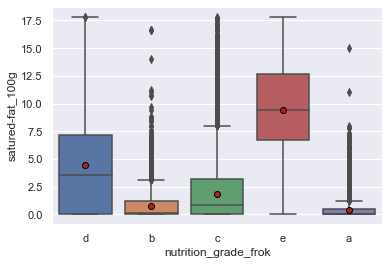

In [9]:
liste_num2 = ['energy_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'fat_100g','satured-fat_100g']
#Box plot affichant le grade nutritionnelle en abscisse et les variables numériques en ordonnée
for variable in liste_num2:
    plt.figure(figsize=(13,4))
    plt.subplot(1,2,1)
    meanprops = {'marker':'o', 'markeredgecolor':'black',
    'markerfacecolor':'firebrick'}
    sns.boxplot("nutrition_grade_frok",variable,data=data_clean, showmeans=True, meanprops=meanprops)

**"Energy_100g"** : Il semble donc que la valeur énergétique fasse augmenter le score nutritionnel, puisque plus la 
valeur énergétique augmente, plus le score devient mauvais.</br>
**"carbohydrates_100g"** : idem que le précédent.</br>
**"sugars-100g"** : A partir d'une certaine valeur, le score "d" et "e" devient de plus en plus présent. Il a donc aussi 
    une influence néfaste sur le nutriscore.</br>
**"fiber_100g"** : Ici, en revanche, on voit que les fibres n'influence pas le score, puisqu'ils sont tous pratiquement
    au même niveau.</br>
**"proteins_100g"** : même remarque que pour les fibres.</br>
**"salt_100g" et "sodium_100g"** : Les box plot sont presques identiques. On voir que plus l'apport de sel est important,
plus le nutriscore devient mauvais.</br>
**"fat_100g" et 'satured-fat_100g'"** : Plus la teneur en graisse est importante, plus le score devient mauvais.</br>
On peut en déduire qu'il y a bien des composantes négatives et positives, et qui vont positionner le produit dans une classe.</br>
Les points positifs sont donnés par la teneur du produit en protéines, fibres, favorables sur le plan nutritionnel.</br>
Les points négatifs sont donnés par la valeur énergétique du produit, la teneur en sucre, sodium et acides gras,
moins favorables.</br>

### <font color="blue" id="section_2_b">b. Graphiques croisant 2 variables numériques </font>

Nous allons voir s'il existe une corrélation probable entre **l'energie, les protéines, le sucre, les graisses,les fibres, le carbohydrate,
le sel, le sodium pour 100g** avec **le score nutritionnel pour 100g.**

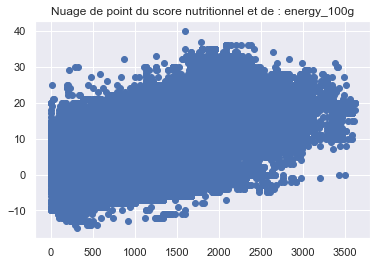

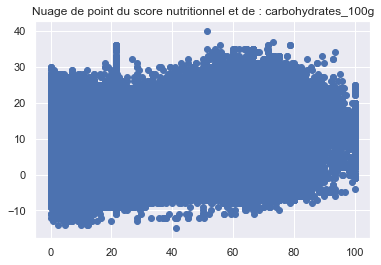

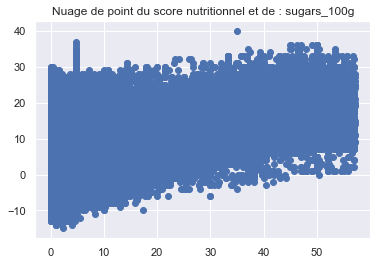

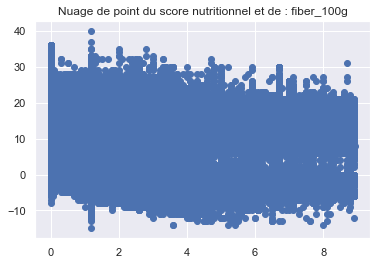

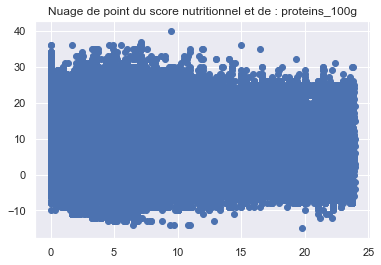

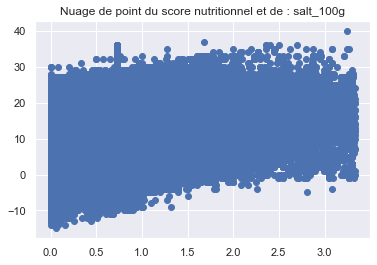

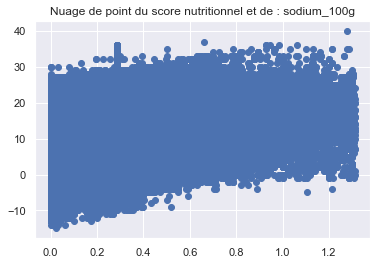

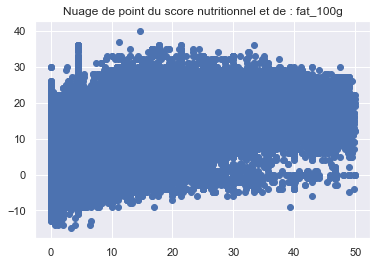

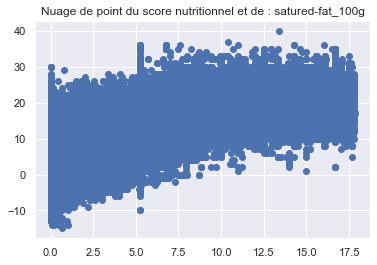

In [10]:
#liste des variables numériques
liste_num2 = ['energy_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'fat_100g','satured-fat_100g']
#Pour chaque variable de la liste des variables numériques
for variable in liste_num2:
    #On trace les nuages de points de la variable numérique en abscisse et le score nutritionnel en ordonnée
    plt.scatter(data_clean[variable], data_clean['nutrition-score-fr_100g_sans_nan'])
    #Titre du nuage de point 
    titre = 'Nuage de point du score nutritionnel et de : ' + variable
    plt.title(titre)
    plt.show()
    print('')

On voit que plus la valeur energétique augmente, plus le score nutritionnel augmente aussi.Cela est aussi le cas pour
le sel, le sodium, et le sucre.</br>
En effet, la teneur en sucre, en gras, en sel et l'apport calorique ont une influence négative sur le score nutritionnelle.
Ils font donc augmenter le score nutritionnel.</br>
En revanche, plus les protéines augmentent et plus le score nutrionnel reste stable. Les protéines n'apportent pas de 
modification au score nutritionnel.</br>
Plus les fibres augmentent et plus le score nutrionnel diminue, ils ont tendance à faire baisser le score nutrionnel.</br>
Tout ceci confirme donc nos conclusions avec le nutriscore.

### <font color="blue" id="section_2_c">c. La matrice des corrélations : qui montre l'importance de la relation linéaire qu'il peut exister entre des paires de variables. </font>

Voyons **la corrélation entre les variables quantitatives**, à l'aide de la matrice de corrélation.</br>
La matrice de corrélation indique les valeurs de corrélation, qui mesurent **le degré de relation linéaire**
entre chaque paire de variables. Les valeurs de corrélation peuvent être comprises entre **-1 et +1**.</br>
Si les deux variables ont tendance à **augmenter et à diminuer en même temps**, la valeur de corrélation est **positive**. </br>

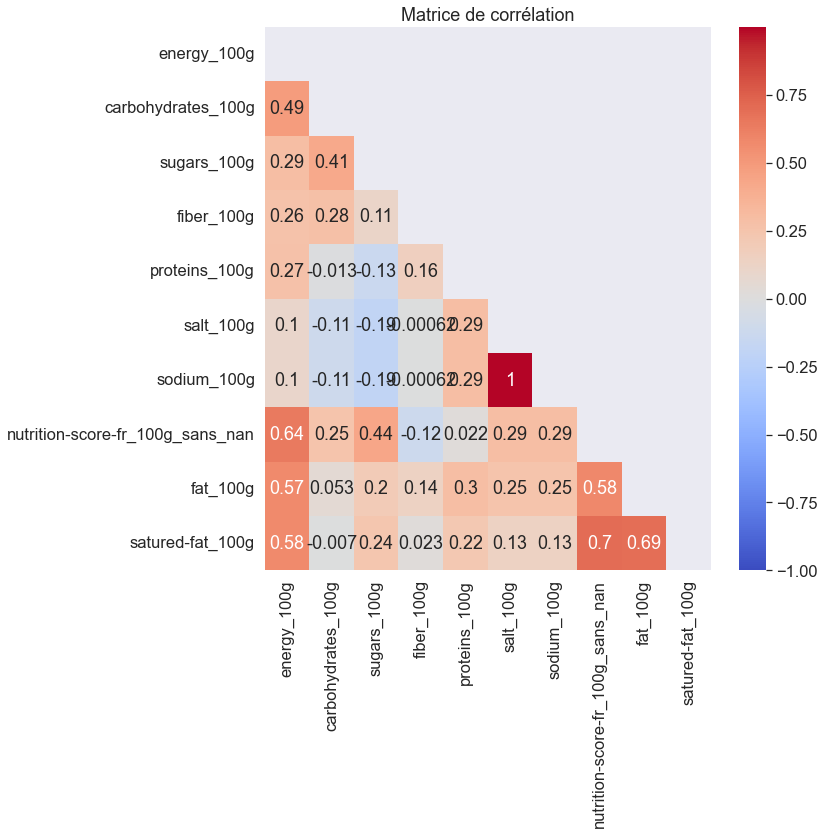

In [11]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation')

corr = data_clean[liste_num].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#On utilise "heatmap", la carte thermique
ax = sns.heatmap(corr, mask=mask,annot=True, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

**Aide à l'interprétation :**</br>
Des valeurs plus proches de zéro signifient qu'il n'y a pas de tendance linéaire entre les deux variables.</br>
Plus la corrélation est proche de 1, plus elles sont corrélées positivement ; c'est-à-dire qu'à mesure que
l'un augmente, l'autre augmente et plus la valeur est proche de 1, plus cette relation est forte. </br>
Une corrélation plus proche de -1 est similaire, mais au lieu d'augmenter les deux, une variable diminuera 
à mesure que l'autre augmentera.</br> 
Pour le reste, plus le nombre est grand et la couleur foncée, plus la corrélation entre les deux variables est élevée.
Le tracé est également symétrique par rapport à la diagonale puisque les deux mêmes variables sont appariées dans 
ces carrés.

On remarque une **forte corrélation positive** entre le sodium et le sel ainsi qu'entre les graisses et graisses saturées. </br>
Ce qui est normal.</br>
</br>
On remarque une **corrélation positive** entre les variables suivantes :</br>
    - les carbohydrates (donc les glucides) avec le sucre,</br>
    - l'apport énergétique avec les graisses/ graisses saturées,  et les carbohydrates (donc les glucides)</br>
    - le score nutritionnel avec l'apport energétique, le sucre, les graisses, et graisses saturées.</br>
</br>
Il y a une **corrélation négative** entre les variables suivantes :</br>
    - le sucre avec les protéines, ainsi que le sel et le sodium, </br>
    - le carbohydrate avec les protéines, </br>
    - le score nutritionnel avec les fibres. </br>
</br>
Enfin, il existe une **corrélation quasi nulle**, donc il n'y a de relation linéaire entre ces variables, pour :
    - le score nutritionnel avec les protéines, </br>
    - les fibres avec le sel et le sodium, </br>
    - les graisses/graisses saturées et le carbohydrate.</br>
    

## <font color="red" id="section_3">3. Analyses multivariées</font>

### <font color="blue" id="section_3_a">a. Réalisation d'une analyse descriptive, avec l'Analyse en Composantes Principales, ACP </font>

Etant donné le nombre important de variables quantitatives, nous allons faire une **analyse en composante principale**
afin de **réduire le nombre de variables** sous forme de facteurs de composantes principales, mais également **étudier 
la différence et les ressemblances entre les produits.**</br>
Nous allons utilisé **l'ébouli de valeurs propres** pour savoir le nombre de composantes dont nous aurons besoin.
En effet, en calculant le **pourcentage d'inertie** pour chacun des axes, nous verrons à partir de combien d'axes
nous aurons un assez grand pourcentage d'informations.

In [15]:
#importation des librairies nécessaires à notre ACP
from sklearn import decomposition
from sklearn import preprocessing

On commence par choisir le **nombre de composantes maximum**, les **variables quantitatives** pour notre ACP, ainsi que
par **préparer nos données** pour l'ACP.

In [12]:
#On sélectionne le nombre de composantes maximum à calculer pour notre ACP
n_comp = 6

#On sélectionne les variables quantitatives nécessaires pour l'ACP
var_quanti = ['energy_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g_sans_nan', 'fat_100g','satured-fat_100g']
data_pca=data_clean[var_quanti]

#Préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean())
    #On convertit ses données en un objet de type Array Numpy
X = data_pca.values
    #On sauvegarde les noms des lignes
names = data_clean.index
    #On sauvegarde les noms des colonnes
features=data_pca.columns


In [13]:
X

array([[2.24300000e+03, 6.42900000e+01, 1.42900000e+01, ...,
        1.40000000e+01, 2.85700000e+01, 8.02058706e+00],
       [1.94100000e+03, 6.07100000e+01, 1.78600000e+01, ...,
        0.00000000e+00, 1.78600000e+01, 0.00000000e+00],
       [2.54000000e+03, 1.78600000e+01, 3.57000000e+00, ...,
        1.20000000e+01, 4.52000000e+00, 5.36000000e+00],
       ...,
       [2.40600000e+03, 2.15400000e+01, 3.89000000e+00, ...,
        0.00000000e+00, 4.52000000e+00, 3.73000000e+00],
       [2.10000000e+01, 5.00000000e-01, 5.00000000e-01, ...,
        2.00000000e+00, 2.00000000e-01, 2.00000000e-01],
       [2.09200000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        5.00000000e+00, 0.00000000e+00, 7.52523384e-03]])

In [16]:
#On centre et réduit les données
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
    #On fournit les données afin de calculer les composantes principales
pca.fit(X_scaled)

PCA(n_components=6)

 Pour connaitre la qualité de représentation d’un individu sur un plan factoriel, on détermine le pourcentage d'inertie
du point expliqué par l'axe.</br>
On peut ainsi afficher un diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe.
Ce diagramme est l'éboulis de valeurs propres.</br>
Nous allons utilisé la fonction **"display_scree_plot"** pour afficher les éboulis de valeurs propres

In [17]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

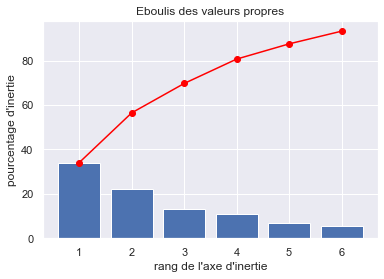

In [18]:
# Eboulis des valeurs propres
display_scree_plot(pca)


In [19]:
#Reprenons le calcul du pourcentage d'inertie "scree" fait dans la fonction "display_scree_plot"
scree = pca.explained_variance_ratio_*100
print("Le % d'inertie expliqué par le premier plan factoriel est de {:.2f}% et pour le second plan, il est de : {:.2f}%.".format(scree[0:2].sum(),scree[0:4].sum()))

Le % d'inertie expliqué par le premier plan factoriel est de 56.49% et pour le second plan, il est de : 80.71%.


Ainsi, les 2 plans factoriels nous donnent environs 81% de l'inertie. Nous allons donc nous baser sur ces 2 plans factoriels.

Pour calculer le cercle de corrélation, nous allons utiliser la fonction **"display_circles"**.

In [20]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box')
            
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

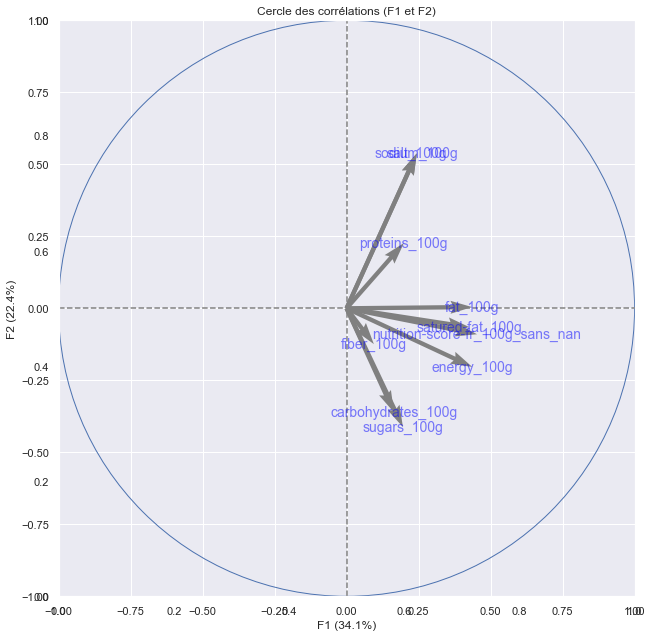

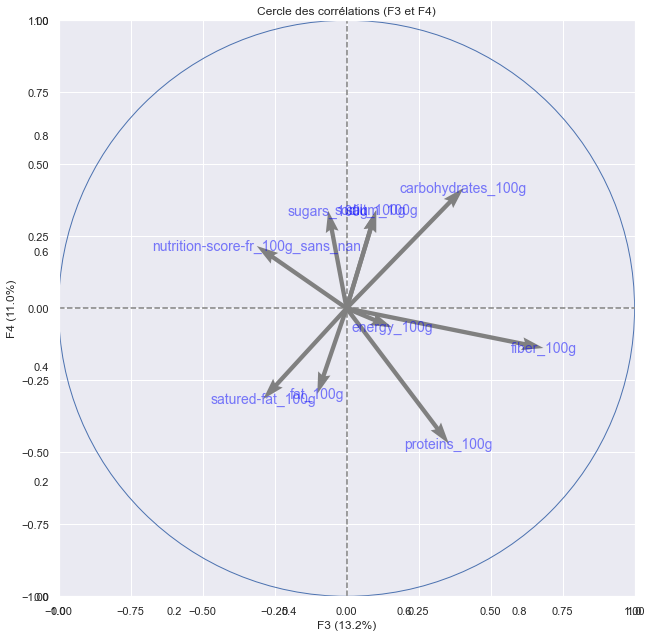

In [21]:
# Cercle des corrélations
    #On récupère le cacul des composantes pour les placer dans une nouvelle variable "pcs"
pcs = pca.components_
    #On utilise la fonction "display_circles" pour créer des cercles de corrélations selon les différents plans factoriels
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))


plt.show()

On voit que **l'axe F1 représente le sucré d'un côté**(avec le sucre et le carbohydrate), **et le salé de l'autre** 
(avec le sel et le sodium). Donc ces 2 propriétés s'opposent sur l'axe F1.</br>
</br>
L'axe **F2 représente l'apport énergétique et les graisses** du même côté.
Le score nutritionnel, les fibres et les protéines sont peu représentés sur ces axes car ils sont proches du centre.</br>

</br>
Pour l'axe F3, nous voyons le score nutritionnel d'un côté, et les fibres et les protéines de l'autre. 


Nous allons projeter les produits de notre dataframe (donc nos individus) sur ces plans factoriels.

Nous allons utilisé la fonction  **"display_factorial_planes"** pour afficher les plans factoriels.

In [ ]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(15,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)



In [61]:
#Nous allons prendre en variable illustratrice le nutriscore.
Var_ill_nutriscore=data_clean["nutrition_grade_frok"].values

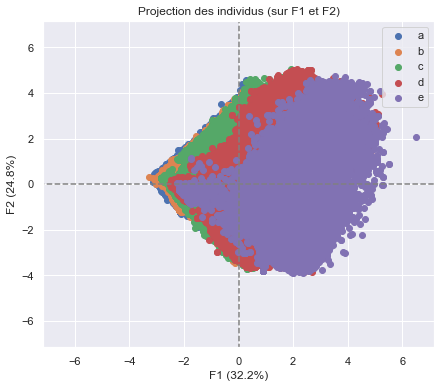

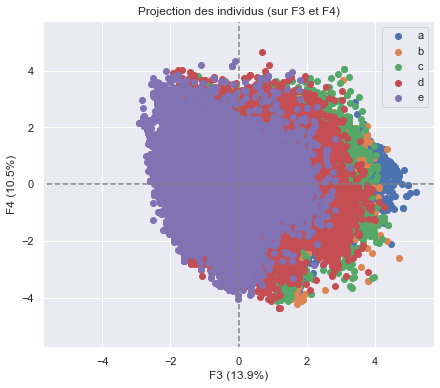

In [62]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, 4, pca, [(0,1),(2,3)], illustrative_var=Var_ill_nutriscore)


La projection des individus ou des produits est assez difficile à interpréter.</br>
En effet, il y a une masse importante qui se situe quasiment au meme niveau pour les 5 nutriscores.</br>
</br>
On a tout de même l'impression que le nutriscore "e" est plus présent au niveau de l'axe F2 qui représente les graisses 
et l'apport calorique.</br>
De même, on pourrait dire que le nutriscore "a" est plutôt proche de l'axe F4 qui représente les protéines et les fibres, 
tandis que le nutriscore "e" est plutôt de l'autre côté de cette axe, où nous avions le score nutrionnel (en effet, le score
nutritionnel est plus élevé pour le nutriscore "e") 

### <font color="blue" id="section_3_b">b. Analyse explicative avec l'Anova</font>

Etant donné les boites à moustaches que nous avions vu qui comparaient les pays suivant leurs scores nutritionnels, on 
peut se poser la question de l'influence du pays sur le score nutritionnel.
Est-ce que le pays dans lequel est vendu le produit a une influence sur le score nutritionnel?
Ainsi, peut-on avoir des scores nutritionnels différents selon les pays?
L'anova nous permet de confirmer ou d'infirmer cette intuition.

**Hypothèse H0** : *Il n'y a pas de différences entre les pays au niveau des scores nutritionnels* donc 
    score du pays 1 = score du pays 2 = score du pays 3 etc...

In [94]:
#on renomme la variable "nutrition-score-fr_100g_sans_nan"
data_clean.rename(columns={'nutrition-score-fr_100g_sans_nan': 'nutrition_score_100g'}, inplace=True)

In [9]:
#import des librairies nécessaires pour l'anova
import statsmodels.formula.api as smf
import statsmodels.api as sm
#Lancons l'anova pour tester l'influence du score nutritionnel
anova_score_nutri = smf.ols('nutrition_score_100g ~ countries_ok',data=data_clean).fit()
#On sort le résumé de
print(anova_score_nutri.summary())

                             OLS Regression Results                             
Dep. Variable:     nutrition_score_100g   R-squared:                       0.008
Model:                              OLS   Adj. R-squared:                  0.008
Method:                   Least Squares   F-statistic:                     97.34
Date:                  Tue, 01 Mar 2022   Prob (F-statistic):               0.00
Time:                          11:18:08   Log-Likelihood:            -9.5597e+05
No. Observations:                266745   AIC:                         1.912e+06
Df Residuals:                    266723   BIC:                         1.912e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Ce qui nous intéresse réellement, c'est **le test de Fisher.**
La p-valeur de ce test (F-statistic) (0.00) est **nulle** et largement inférieure à 5 %. On rejette donc l'hypothèse H0.
*Le pays dans lequel est vendu le produit a donc bien un effet sur le score nutritionnel, comme nous en avions
l'intuition en regardant les boîtes à moustaches.*
Pour obtenir le tableau de l'analyse de la variance, on utilise la commande anova_lm :

In [12]:
sm.stats.anova_lm(anova_score_nutri, typ=2)

,sum_sq,df,F,PR(>F)
countries_ok,1.552212e+05,21.0,97.337721,0.0
Residual,2.025401e+07,266723.0,NaN,NaN


**Réalisons maintenant l'Analyse de la Variance sur la catégorie de produit utilisé "pnns_groups_1" et "pnns_groups_2":**

**Hypothèse H0** : *la catégorie du produits n'influence pas le score nutritionnel*, c'est à dire que le score nutritionnel 
    est le même pour toutes les catégories de produit. C'est à dire que "score de la catégorie 1" = "score de la catégorie 2" etc

In [95]:
anova_categ = smf.ols('nutrition_score_100g ~ pnns_groups_1', data=data_clean).fit()
print(anova_categ.summary())
sm.stats.anova_lm(anova_categ, typ=2)

                             OLS Regression Results                             
Dep. Variable:     nutrition_score_100g   R-squared:                       0.077
Model:                              OLS   Adj. R-squared:                  0.077
Method:                   Least Squares   F-statistic:                     1162.
Date:                  Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                          19:12:55   Log-Likelihood:            -5.8447e+05
No. Observations:                166402   AIC:                         1.169e+06
Df Residuals:                    166389   BIC:                         1.169e+06
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

,sum_sq,df,F,PR(>F)
pnns_groups_1,9.175226e+05,12.0,1161.547778,0.0
Residual,1.095275e+07,166389.0,NaN,NaN


In [97]:
anova_categ2 = smf.ols('nutrition_score_100g ~ pnns_groups_2', data=data_clean).fit()
print(anova_categ2.summary())
sm.stats.anova_lm(anova_categ2, typ=2)

                             OLS Regression Results                             
Dep. Variable:     nutrition_score_100g   R-squared:                       0.104
Model:                              OLS   Adj. R-squared:                  0.104
Method:                   Least Squares   F-statistic:                     481.5
Date:                  Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                          19:15:20   Log-Likelihood:            -5.8205e+05
No. Observations:                166402   AIC:                         1.164e+06
Df Residuals:                    166361   BIC:                         1.165e+06
Df Model:                            40                                         
Covariance Type:              nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

,sum_sq,df,F,PR(>F)
pnns_groups_2,1.231544e+06,40.0,481.450959,0.0
Residual,1.063872e+07,166361.0,NaN,NaN


On trouve ici une p-valeur de 0 pour "pnns_groups_1",et 0 pour "pnns_groups_2" ce qui est très en-dessous de 5 %.
On rejette donc l'hypothèse H0 selon laquelle la catégorie influence le score nutritionnel.

Il y a ici un effet de la catégorie sur le score nutrionnel, tout au moins un effet significatif.